<a href="https://colab.research.google.com/github/lifeisawavesorideit/99_LEARN_jvns_pandas-cookbook/blob/master/Chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# 4.1 Adding a weekday column to the dataframe

In [3]:
CSV_PATH = 'https://raw.githubusercontent.com/lifeisawavesorideit/99_LEARN_jvns_pandas-cookbook/master/data/bikes.csv'

In [4]:
bikes = pd.read_csv(CSV_PATH, sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [5]:
bikes

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN


In [6]:
bikes.dtypes

Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

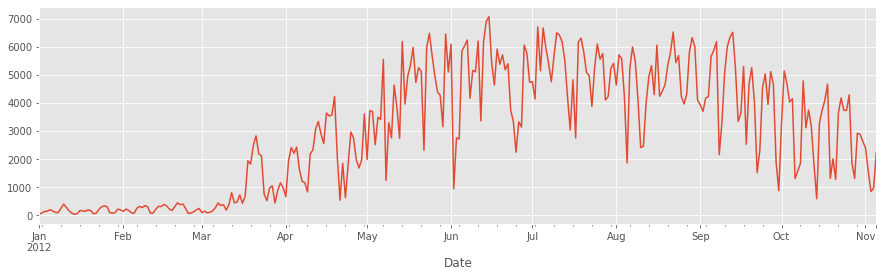

In [7]:
bikes['Berri 1'].plot()

In [8]:
berri_bikes = bikes[['Berri 1']].copy()

In [9]:
berri_bikes

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197
...,...
2012-11-01,2405
2012-11-02,1582
2012-11-03,844


In [10]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [11]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

In [12]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

In [13]:
berri_bikes['Weekyday'] = berri_bikes.index.weekday

In [14]:
berri_bikes

,Berri 1,Weekyday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
...,...,...
2012-11-01,2405,3
2012-11-02,1582,4
2012-11-03,844,5


# 4.2 Adding up the cyclist by weekday

In [15]:
berri_bikes.groupby('Weekyday').sum()

,Berri 1
Weekyday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [20]:
weekday_counts=berri_bikes.groupby('Weekyday').aggregate(sum)
weekday_counts

,Berri 1
Weekyday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [21]:
type(weekday_counts)

pandas.core.frame.DataFrame

In [25]:
weekday_counts.loc[0:3,'Berri 1']

Weekyday
0    134298
1    135305
2    152972
3    160131
Name: Berri 1, dtype: int64

In [27]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


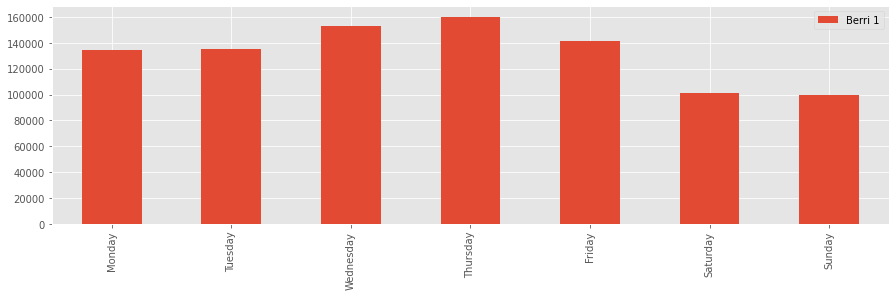

In [28]:
weekday_counts.plot(kind='bar')